LOAN APPROVAL PREDICTION USING MACHINE LEARNING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Objective

The purpose of this project is to construct and compare a robust machine learning pipeline that predicts loan approval status. The main goal is to inspect a provided loan application dataset, preprocess the data to address missing values, outliers, and skewness, and finally train a number of classification models to see which performs most effectively in predicting if a loan will be approved ('Y') or not approved ('N').

Steps to follow are:

Data Loading and Initial Exploration: Learn the structure of the dataset, determine data types, and identify missing values. Visualize preliminary distributions to develop insights.

Data Preprocessing: Clean and preprocess the raw data into a format appropriate for machine learning algorithms.
This includes:
Dealing with missing values through imputation methods.
Identifying and dealing with outliers to prevent their negative impact on model training.
Resolution of data skewness by applying transformations in order to simulate normal distributions, aiding models with sensitivity toward distributions in features.
Categorical feature encoding into numerical values.
Scaling numerical features so that all features have equal impacts on the model.

Model Selection and Training: Train several popular classification algorithms (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, K-Nearest Neighbors, Support Vector Machine) on the preprocessed dataset.

Model Evaluation: Evaluate the performance of every trained model with common classification metrics such as Accuracy, Classification Report (Precision, Recall, F1-score), and Confusion Matrix. Visualizations are utilized to give informative insights into model performance.

Prediction Example: Show how to utilize the highest-performing model to make predictions on new, unseen loan application data.

Data Loading

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving LoanApprovalPrediction.csv to LoanApprovalPrediction (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('LoanApprovalPrediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [ ]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,float64
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
# Checking the shape of the dataset
df.shape

(598, 13)

In [ ]:
print(df.describe(include='all'))

         Loan_ID Gender Married  Dependents Education Self_Employed  \
count        598    598     598  586.000000       598           598   
unique       598      2       2         NaN         2             2   
top     LP002990   Male     Yes         NaN  Graduate            No   
freq           1    487     388         NaN       465           488   
mean         NaN    NaN     NaN    0.755973       NaN           NaN   
std          NaN    NaN     NaN    1.007751       NaN           NaN   
min          NaN    NaN     NaN    0.000000       NaN           NaN   
25%          NaN    NaN     NaN    0.000000       NaN           NaN   
50%          NaN    NaN     NaN    0.000000       NaN           NaN   
75%          NaN    NaN     NaN    1.750000       NaN           NaN   
max          NaN    NaN     NaN    3.000000       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        598.000000         598.000000  577.000000        584.00000

include=all provides statistics for both numerical and categorical columns

In [ ]:
print(df.isnull().sum())

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


# Shows how many NaN (Not a Number) values are in each column

In [ ]:
target_variable = 'Loan_Status'
if target_variable not in df.columns:
  print(f"\nDistribution of the target variable '{target_variable}':")
print(df[target_variable].value_counts(normalize=True))

Loan_Status
Y    0.687291
N    0.312709
Name: proportion, dtype: float64


In [ ]:
# Dynamically identify categorical and numerical features
# Exclude the target variable from features before identifying types
features_df = df.drop(columns=[target_variable])
numerical_cols = features_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = features_df.select_dtypes(include='object').columns.tolist()

In [ ]:
print(f"\nIdentified Categorical features: {categorical_cols}")
print(f"Identified Numerical features: {numerical_cols}")


Identified Categorical features: ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
Identified Numerical features: ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Observation: Correctly identifying feature types is vital for applying appropriate preprocessing steps dynamically based on loaded data

Data Visualization: Initial Distributions

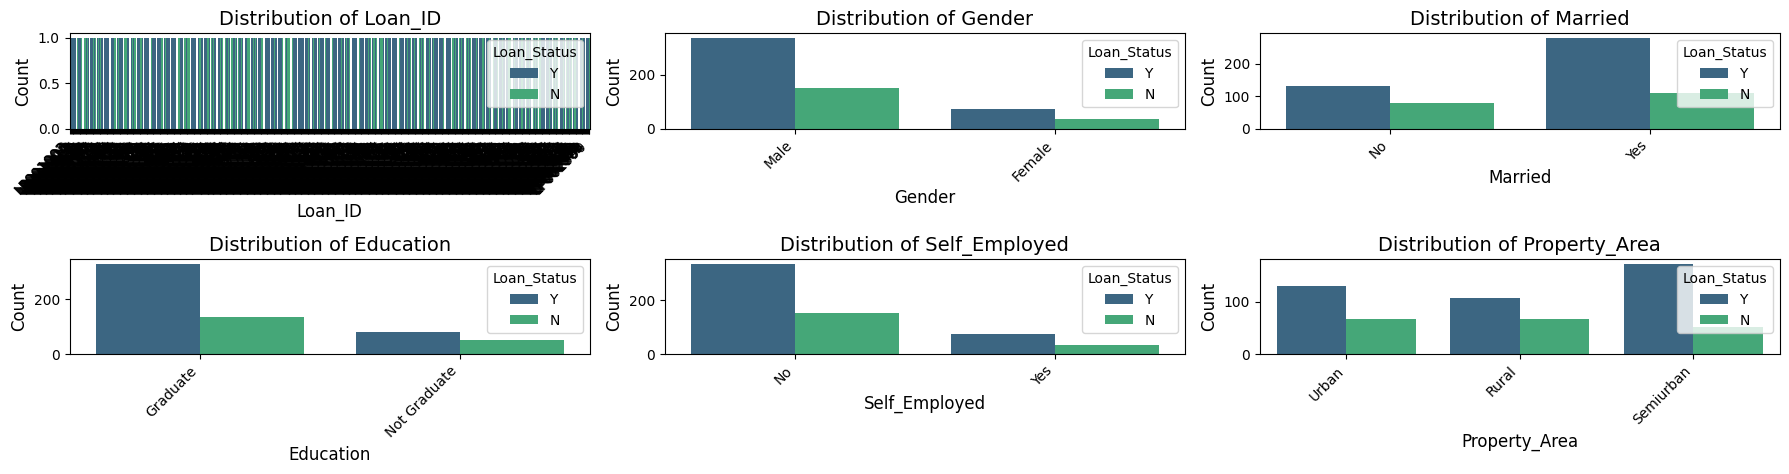

In [ ]:
# Plotting distributions for categorical features
plt.figure(figsize=(18, max(6, 3 * ((len(categorical_cols) + 2) // 3))))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis', hue=target_variable)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observation: These bar plots illustrate the number of each category in dataset's features and how they correlate to the loan status. Identify categories that appear to strongly determine loan approval (e.g., 'Credit_History' should have a strong correlation.

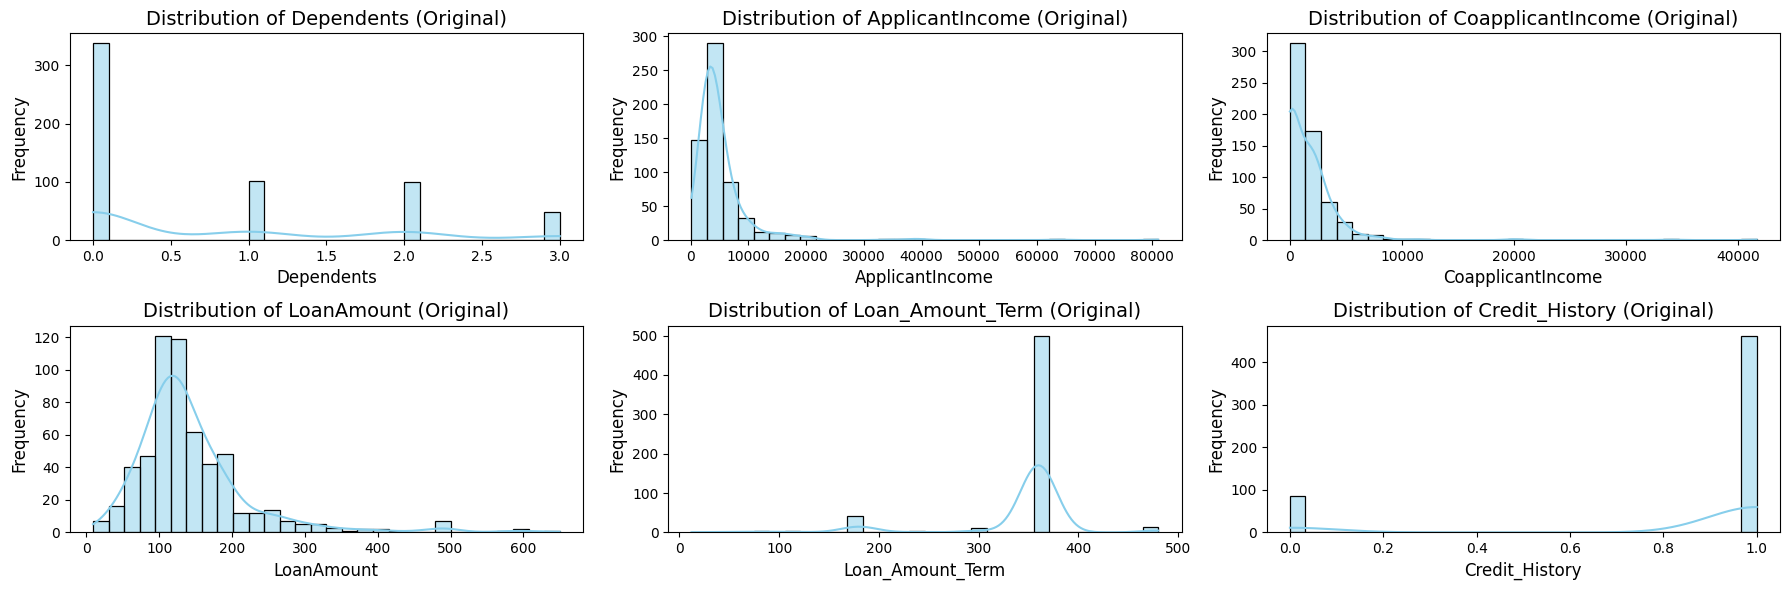

In [ ]:
# Plotting distributions for numerical features (before any transformations)
plt.figure(figsize=(18, max(6, 3 * ((len(numerical_cols) + 2) // 3)))) # Adjust figure size dynamically
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue') # Histogram with Kernel Density Estimate (KDE)
    plt.title(f'Distribution of {col} (Original)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

Observation:Histograms show the form of numerical data distributions. Characteristics such as income and loan amount frequently have positive skewness, i.e., a tail in the direction of higher values. This will be dealt with by skewness handling.

Outlier Detection and Handling

<ipython-input-20-d659e1421e80>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col].dropna(), palette='pastel') # Box plot for numerical features
<ipython-input-20-d659e1421e80>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col].dropna(), palette='pastel') # Box plot for numerical features
<ipython-input-20-d659e1421e80>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col].dropna(), palette='pastel') # Box plot for numerical features
<ipython-input-20-d659e1421e80>:5: FutureWarning: 

Passing `palette` without assigning 

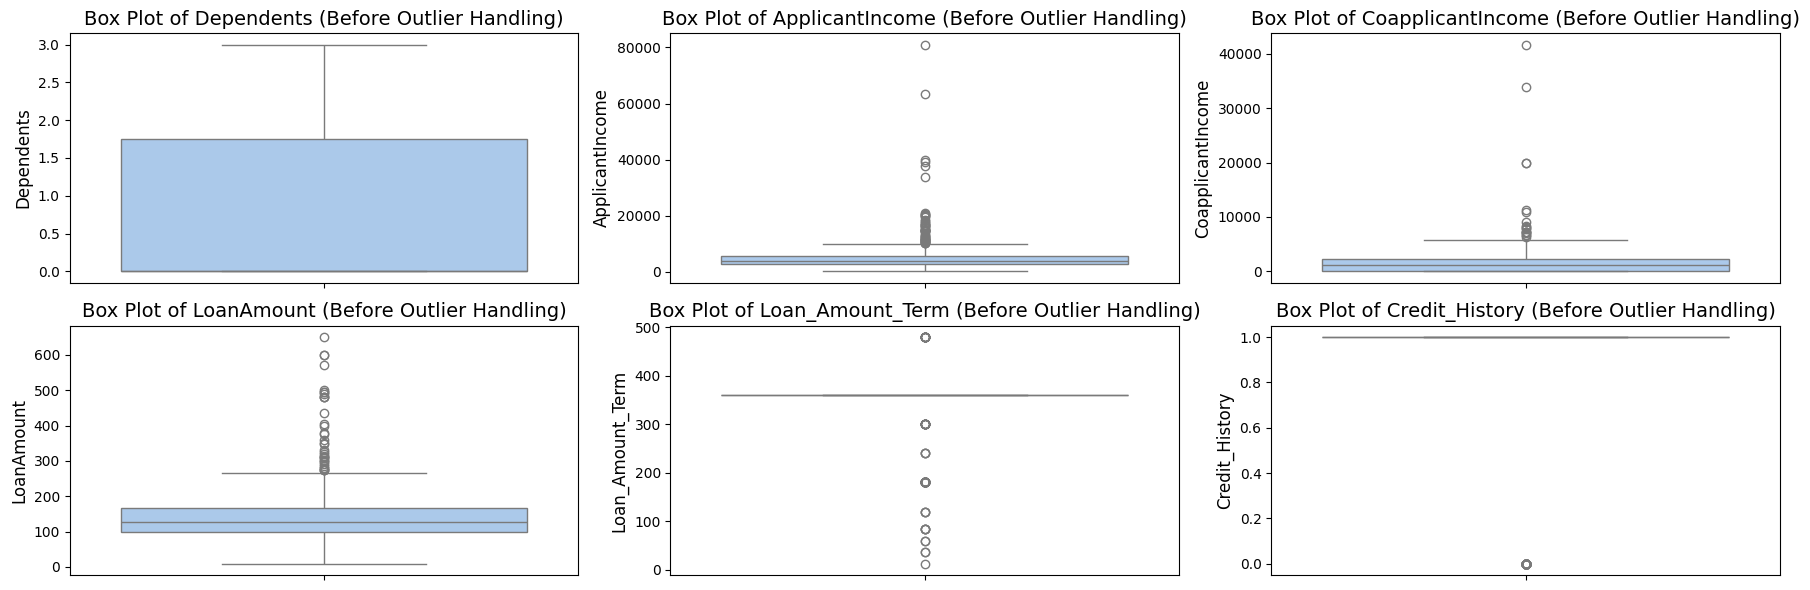

In [ ]:
# Plotting box plots to visualize outliers before handling
plt.figure(figsize=(18, max(6, 3 * ((len(numerical_cols) + 2) // 3)))) # Adjust figure size dynamically
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col].dropna(), palette='pastel') # Box plot for numerical features
    plt.title(f'Box Plot of {col} (Before Outlier Handling)', fontsize=14)
    plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.show()

Observation: Box plots visually represent the distribution of numerical data and clearly show potential outliers as individual points beyond the whiskers.

In [ ]:
outlier_info = {}
for col in numerical_cols:
    # Drop NA values before calculating quantiles for accurate bounds
    temp_series = df[col].dropna()
    if not temp_series.empty: # Ensure the series is not empty
        Q1 = temp_series.quantile(0.25)
        Q3 = temp_series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_info[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': len(outliers)
        }
        print(f"\nFeature: {col}")
        print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
        print(f"  Lower Bound (IQR): {lower_bound:.2f}")
        print(f"  Upper Bound (IQR): {upper_bound:.2f}")
        print(f"  Number of outliers (IQR method): {len(outliers)}")
        if len(outliers) > 0:
            # Show a sample of outliers, up to 5
            print(f"  Sample Outliers (IQR method): {outliers.head().tolist()}...")
            # Capping outliers:
        # Values below the lower bound are set to the lower bound.
        # Values above the upper bound are set to the upper bound.
        # This prevents extreme values from disproportionately influencing the model.
        df[col] = np.where(df[col].notna() & (df[col] < lower_bound), lower_bound, df[col])
        df[col] = np.where(df[col].notna() & (df[col] > upper_bound), upper_bound, df[col])
    else:
        print(f"\nFeature: {col} has no data after dropping NA values for outlier detection.")


Feature: Dependents
  Q1: 0.00, Q3: 1.75, IQR: 1.75
  Lower Bound (IQR): -2.62
  Upper Bound (IQR): 4.38
  Number of outliers (IQR method): 0

Feature: ApplicantIncome
  Q1: 2877.50, Q3: 5746.00, IQR: 2868.50
  Lower Bound (IQR): -1425.25
  Upper Bound (IQR): 10048.75
  Number of outliers (IQR method): 48
  Sample Outliers (IQR method): [12841, 12500, 11500, 10750, 13650]...

Feature: CoapplicantIncome
  Q1: 0.00, Q3: 2324.00, IQR: 2324.00
  Lower Bound (IQR): -3486.00
  Upper Bound (IQR): 5810.00
  Number of outliers (IQR method): 18
  Sample Outliers (IQR method): [10968.0, 8106.0, 7210.0, 8980.0, 7750.0]...

Feature: LoanAmount
  Q1: 100.00, Q3: 167.00, IQR: 67.00
  Lower Bound (IQR): -0.50
  Upper Bound (IQR): 267.50
  Number of outliers (IQR method): 36
  Sample Outliers (IQR method): [349.0, 315.0, 320.0, 286.0, 312.0]...

Feature: Loan_Amount_Term
  Q1: 360.00, Q3: 360.00, IQR: 0.00
  Lower Bound (IQR): 360.00
  Upper Bound (IQR): 360.00
  Number of outliers (IQR method): 84
  

Observation: Outliers in numerical features have been identified using the IQR method. We then apply 'capping' to handle them, meaning values outside the calculated bounds are replaced with the respective bound values. This reduces the impact of extreme values without removing data points.

<ipython-input-24-3a912cfe3a24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col].dropna(), palette='pastel')
<ipython-input-24-3a912cfe3a24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col].dropna(), palette='pastel')
<ipython-input-24-3a912cfe3a24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col].dropna(), palette='pastel')
<ipython-input-24-3a912cfe3a24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

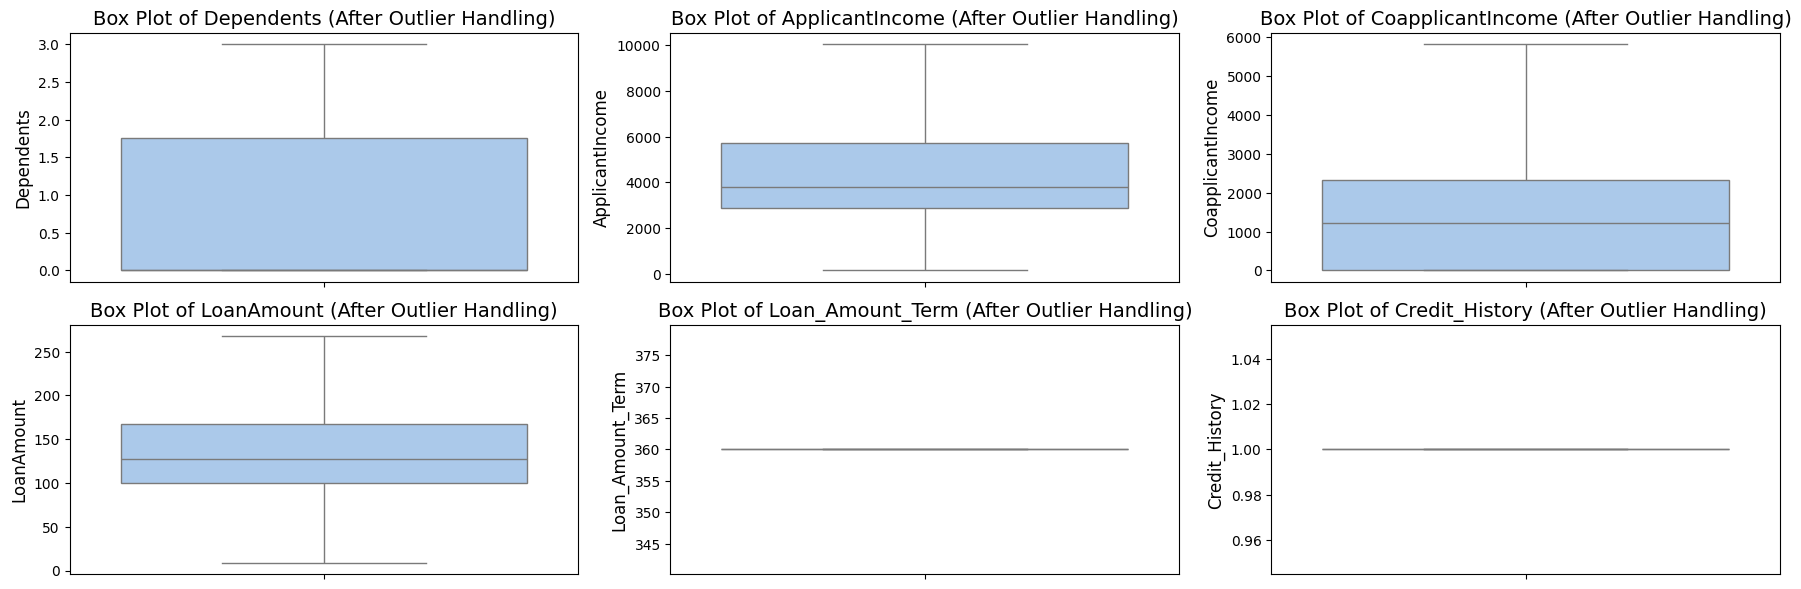

In [ ]:
# Plotting box plots after outlier handling (capping)
plt.figure(figsize=(18, max(6, 3 * ((len(numerical_cols) + 2) // 3)))) # Adjust figure size dynamically
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col].dropna(), palette='pastel')
    plt.title(f'Box Plot of {col} (After Outlier Handling)', fontsize=14)
    plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.show()

Observation: After capping, the box plots show that the extreme outliers are no longer present, and the data distribution appears more constrained within the whiskers.


Skewness Detection and Handling

In [ ]:
# --- Skewness Detection and Handling ---
print("\n--- Skewness Detection and Handling for Numerical Features ---")
print("Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean.")
print("Positive skew (right-skewed): Long tail on the right. Mean > Median.")
print("Negative skew (left-skewed): Long tail on the left. Mean < Median.")
print("Zero skew: Symmetric distribution. Mean = Median = Mode.")
print("Transformations help in making the distribution more symmetric, improving model performance, especially for linear models.")


--- Skewness Detection and Handling for Numerical Features ---
Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean.
Positive skew (right-skewed): Long tail on the right. Mean > Median.
Negative skew (left-skewed): Long tail on the left. Mean < Median.
Zero skew: Symmetric distribution. Mean = Median = Mode.
Transformations help in making the distribution more symmetric, improving model performance, especially for linear models.


In [ ]:
# Calculate skewness before transformation
print("\nSkewness of numerical features (Before Transformation - after outlier capping):")
for col in numerical_cols:
    # Ensure to drop NA values before calculating skewness
    skew_val = df[col].skew()
    print(f"  {col}: {skew_val:.4f}")


Skewness of numerical features (Before Transformation - after outlier capping):
  Dependents: 0.9862
  ApplicantIncome: 1.0363
  CoapplicantIncome: 1.0203
  LoanAmount: 0.7074
  Loan_Amount_Term: 0.0000
  Credit_History: 0.0000


Observation: 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount' (or equivalent columns in your dataset) might still show positive skewness, indicating a longer tail towards higher values.



Applying log1p transformation to: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
Numerical Preprocessing Pipeline updated to include log1p transformation.


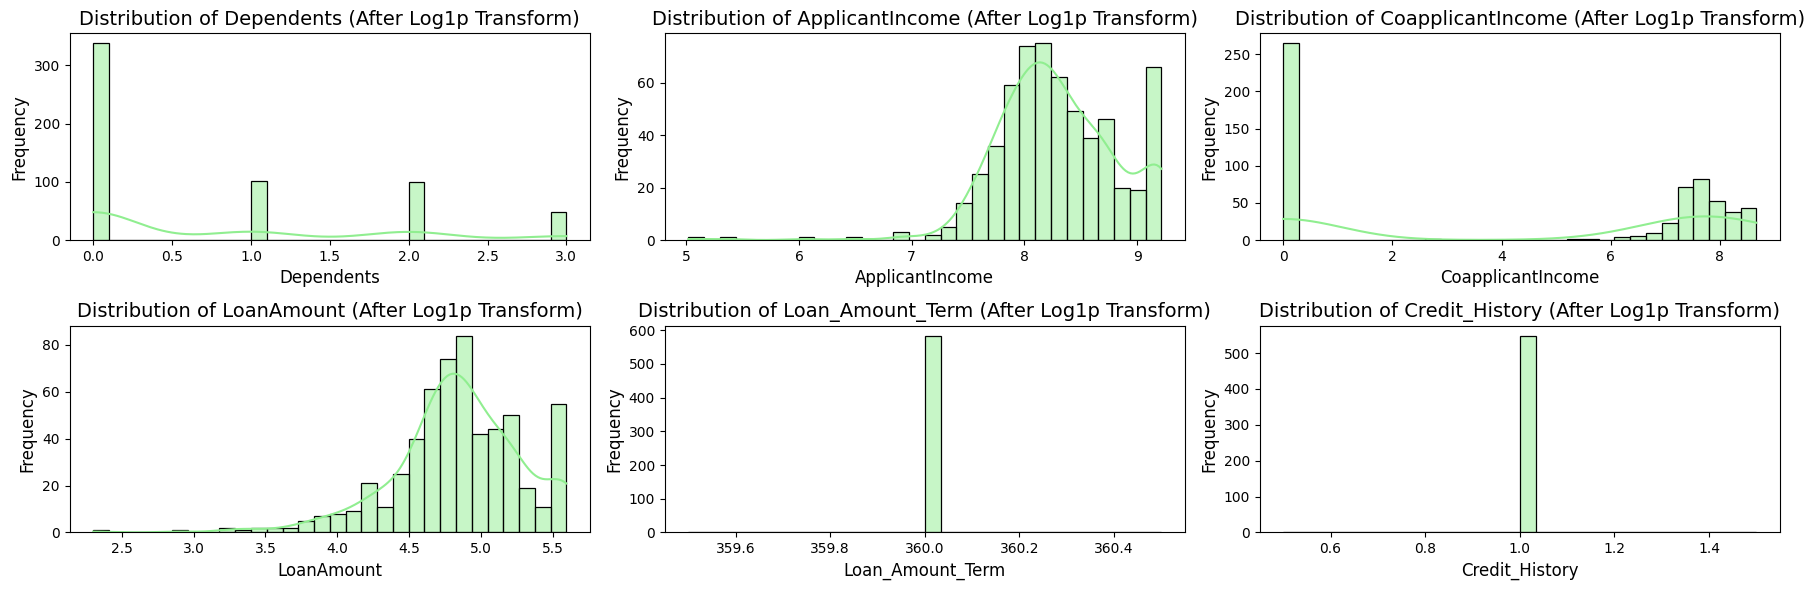

Observation: Histograms after log1p transformation should show a more symmetrical distribution, which is beneficial for many models.

Skewness of numerical features (After Transformation):
  Dependents: 0.9862
  ApplicantIncome: -0.6118
  CoapplicantIncome: -0.1906
  LoanAmount: -0.8468
  Loan_Amount_Term: 0.0000
  Credit_History: 0.0000
Observation: The skewness values should be closer to zero after the transformation, indicating a more symmetric distribution.


In [ ]:
# Features to apply log transformation. Adjust these names based on your actual dataset's column names.
transform_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
# Filter out features that are not in the numerical_cols of the actual dataset
transform_features = [f for f in transform_features if f in numerical_cols]

if transform_features:
    print(f"\nApplying log1p transformation to: {transform_features}")

    # Create new numerical transformer including transformation step
    # This transformer will be used within the ColumnTransformer later.
    numerical_transformer_with_skew_handling = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('log_transform', FunctionTransformer(np.log1p, validate=True)),
        ('scaler', StandardScaler())])
    print("Numerical Preprocessing Pipeline updated to include log1p transformation.")

    # Create a temporary DataFrame for plotting after transformation for visualization purposes
    df_transformed_temp = df[numerical_cols].copy()
    for col in transform_features:
        # Only apply transformation to non-NA values
        df_transformed_temp.loc[df_transformed_temp[col].notna(), col] = np.log1p(df_transformed_temp.loc[df_transformed_temp[col].notna(), col])

    # Plotting distributions after transformation
    plt.figure(figsize=(18, max(6, 3 * ((len(numerical_cols) + 2) // 3))))
    for i, col in enumerate(numerical_cols):
        plt.subplot(2, 3, i + 1)
        sns.histplot(df_transformed_temp[col].dropna(), kde=True, bins=30, color='lightgreen')
        plt.title(f'Distribution of {col} (After Log1p Transform)', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()
    print("Observation: Histograms after log1p transformation should show a more symmetrical distribution, which is beneficial for many models.")

    print("\nSkewness of numerical features (After Transformation):")
    for col in numerical_cols:
        skew_val = df_transformed_temp[col].skew()
        print(f"  {col}: {skew_val:.4f}")
    print("Observation: The skewness values should be closer to zero after the transformation, indicating a more symmetric distribution.")
else:
    print("\nNo features were identified for log transformation based on the default list. If your numerical features are different, please adjust 'transform_features'.")
    numerical_transformer_with_skew_handling = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])
    print("Proceeding without skewness transformation due to no matching features or empty list.")

In [ ]:
# --- 2. Data Preprocessing (rest of the original section, using updated numerical_transformer) ---
# Separate features (X) from the target variable (y)
X = df.drop(target_variable, axis=1)
y = df[target_variable]

Observation: Separating features and target is a crucial first step for supervised learning tasks.

In [ ]:
# Encode the target variable 'Loan_Status' from 'Y'/'N' to numerical 1/0
# Machine learning models require numerical input.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(f"\nTarget variable encoded. Mapping: {list(label_encoder.classes_)} -> {label_encoder.transform(label_encoder.classes_)}")
print("Observation: Your target variable is mapped to numerical format, necessary for binary classification models.")


Target variable encoded. Mapping: ['N', 'Y'] -> [0 1]
Observation: Your target variable is mapped to numerical format, necessary for binary classification models.


In [ ]:
# Identify categorical and numerical features again in case any changes were made to df
# (though for this script, they should be the same after outlier/skewness handling as type doesn't change)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nRe-identified Categorical features: {categorical_features}")
print(f"Re-identified Numerical features: {numerical_features}")


Re-identified Categorical features: ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
Re-identified Numerical features: ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Observation: Confirming feature types for pipeline construction

In [ ]:
# Categorical pipeline: Impute missing values with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
print("Categorical Preprocessing Pipeline created: Imputation (Most Frequent) -> One-Hot Encoding.")

Categorical Preprocessing Pipeline created: Imputation (Most Frequent) -> One-Hot Encoding.


In [ ]:
# Create a preprocessor using ColumnTransformer
# This allows applying different transformations to different columns simultaneously.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_with_skew_handling, numerical_features),
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough' # Keep any other columns (if any) that weren't explicitly transformed)
print("\nColumnTransformer updated to apply specific preprocessing to numerical and categorical features, including skewness handling.")
print("Observation: The preprocessing pipeline now automates handling of missing values, outlier capping, feature transformation (for skewness), and scaling, ensuring data is in the correct format for models.")


ColumnTransformer updated to apply specific preprocessing to numerical and categorical features, including skewness handling.
Observation: The preprocessing pipeline now automates handling of missing values, outlier capping, feature transformation (for skewness), and scaling, ensuring data is in the correct format for models.


Model Selection and Training

In [ ]:
# Split data into training and testing sets
# X_train, y_train: used to train the models.
# X_test, y_test: used to evaluate the models' performance on unseen data.
# test_size=0.2 means 20% of the data will be used for testing, 80% for training.
# random_state ensures reproducibility of the split.
# stratify=y ensures that the proportion of 'Y' and 'N' in y_train and y_test is similar to the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 478 samples
Testing set size: 120 samples


Observation: Data splitting is critical to assess a model's generalization ability and prevent overfitting.

In [ ]:
# Define multiple classifiers to evaluate their performance on the loan approval task
# Each classifier has its own strengths and weaknesses.
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear', max_iter=200), # Good for binary classification, interpretable
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42), # Simple, can overfit easily, but good for understanding rules
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42), # Ensemble method, robust to overfitting, good performance
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=100, random_state=42), # Another powerful ensemble method, often high performance
    "K-Nearest Neighbors": KNeighborsClassifier(), # Non-parametric, considers distances between data points
    "Support Vector Machine": SVC(random_state=42, probability=True) # Effective in high-dimensional spaces, but can be slow on large datasets
}
print("\nSelected the following machine learning models for training and evaluation:")
for name in classifiers.keys():
    print(f"- {name}")


Selected the following machine learning models for training and evaluation:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- K-Nearest Neighbors
- Support Vector Machine


Observation: Evaluating multiple models provides a comprehensive understanding of which algorithm is best suited for the given dataset and problem.

In [ ]:
# Dictionary to store accuracy of each model for comparison
model_accuracies = {}

Model Training and Evaluation


----- Training and Evaluating: Logistic Regression -----
Model training complete.
Observation: The Logistic Regression model has learned patterns from the training data.
Predictions made on the test set.

Accuracy for Logistic Regression: 0.6833
Observation: Accuracy is the proportion of correctly predicted instances.

Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        38
           Y       0.68      1.00      0.81        82

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.41       120
weighted avg       0.47      0.68      0.55       120

Observation: The classification report gives a more detailed view of performance, especially for imbalanced datasets.
  - Precision: Out of all predictions for a class, how many were correct?
  - Recall: Out of all actual instances of a class, how many were correctly predicted?
  - F1-Score: Harmonic mean of precision and reca

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


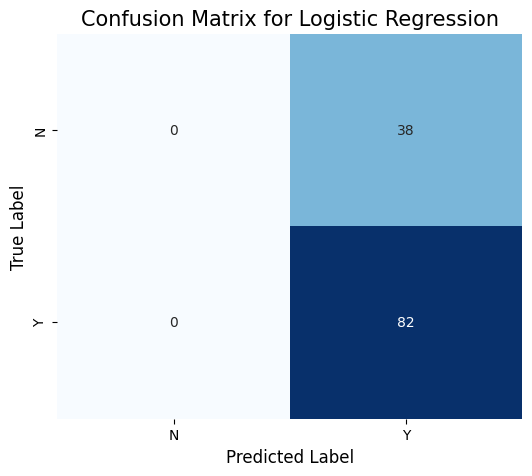


----- Training and Evaluating: Decision Tree Classifier -----
Model training complete.
Observation: The Decision Tree Classifier model has learned patterns from the training data.
Predictions made on the test set.

Accuracy for Decision Tree Classifier: 0.5750
Observation: Accuracy is the proportion of correctly predicted instances.

Classification Report:
              precision    recall  f1-score   support

           N       0.26      0.18      0.22        38
           Y       0.67      0.76      0.71        82

    accuracy                           0.57       120
   macro avg       0.46      0.47      0.46       120
weighted avg       0.54      0.57      0.55       120

Observation: The classification report gives a more detailed view of performance, especially for imbalanced datasets.
  - Precision: Out of all predictions for a class, how many were correct?
  - Recall: Out of all actual instances of a class, how many were correctly predicted?
  - F1-Score: Harmonic mean of pre

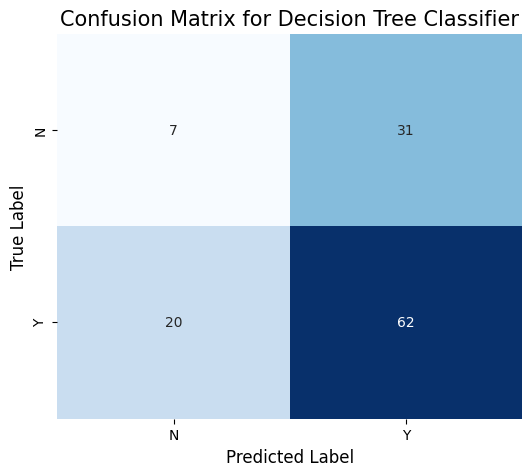


----- Training and Evaluating: Random Forest Classifier -----
Model training complete.
Observation: The Random Forest Classifier model has learned patterns from the training data.
Predictions made on the test set.

Accuracy for Random Forest Classifier: 0.6833
Observation: Accuracy is the proportion of correctly predicted instances.

Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        38
           Y       0.68      1.00      0.81        82

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.41       120
weighted avg       0.47      0.68      0.55       120

Observation: The classification report gives a more detailed view of performance, especially for imbalanced datasets.
  - Precision: Out of all predictions for a class, how many were correct?
  - Recall: Out of all actual instances of a class, how many were correctly predicted?
  - F1-Score: Harmonic mean of pre

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


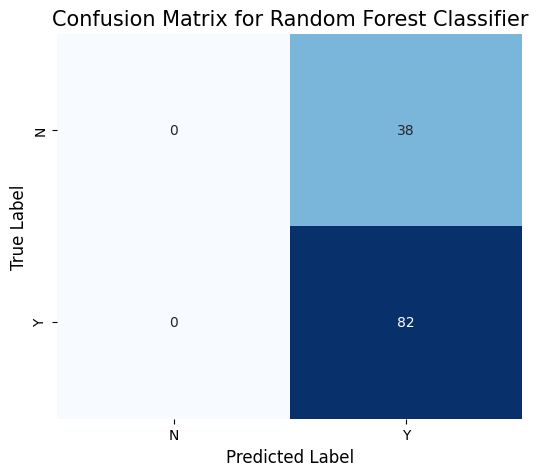


----- Training and Evaluating: Gradient Boosting Classifier -----
Model training complete.
Observation: The Gradient Boosting Classifier model has learned patterns from the training data.
Predictions made on the test set.

Accuracy for Gradient Boosting Classifier: 0.6833
Observation: Accuracy is the proportion of correctly predicted instances.

Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        38
           Y       0.68      1.00      0.81        82

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.41       120
weighted avg       0.47      0.68      0.55       120

Observation: The classification report gives a more detailed view of performance, especially for imbalanced datasets.
  - Precision: Out of all predictions for a class, how many were correct?
  - Recall: Out of all actual instances of a class, how many were correctly predicted?
  - F1-Score: Harmonic

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


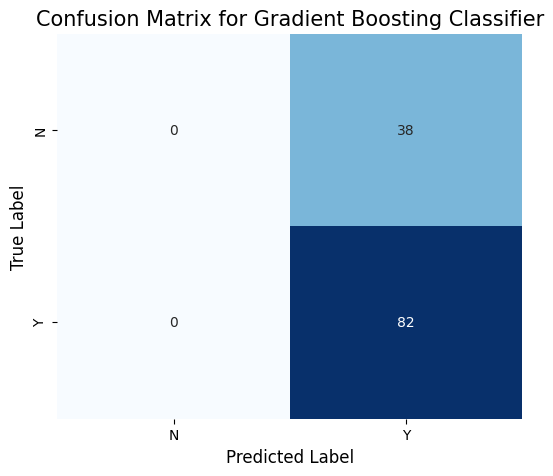


----- Training and Evaluating: K-Nearest Neighbors -----
Model training complete.
Observation: The K-Nearest Neighbors model has learned patterns from the training data.
Predictions made on the test set.

Accuracy for K-Nearest Neighbors: 0.6333
Observation: Accuracy is the proportion of correctly predicted instances.

Classification Report:
              precision    recall  f1-score   support

           N       0.29      0.11      0.15        38
           Y       0.68      0.88      0.77        82

    accuracy                           0.63       120
   macro avg       0.48      0.49      0.46       120
weighted avg       0.55      0.63      0.57       120

Observation: The classification report gives a more detailed view of performance, especially for imbalanced datasets.
  - Precision: Out of all predictions for a class, how many were correct?
  - Recall: Out of all actual instances of a class, how many were correctly predicted?
  - F1-Score: Harmonic mean of precision and reca

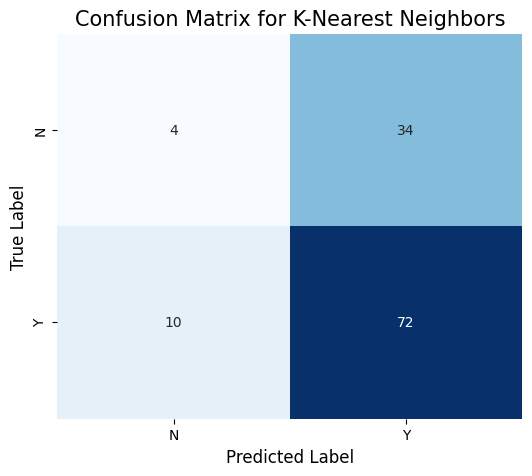


----- Training and Evaluating: Support Vector Machine -----
Model training complete.
Observation: The Support Vector Machine model has learned patterns from the training data.
Predictions made on the test set.

Accuracy for Support Vector Machine: 0.6833
Observation: Accuracy is the proportion of correctly predicted instances.

Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        38
           Y       0.68      1.00      0.81        82

    accuracy                           0.68       120
   macro avg       0.34      0.50      0.41       120
weighted avg       0.47      0.68      0.55       120

Observation: The classification report gives a more detailed view of performance, especially for imbalanced datasets.
  - Precision: Out of all predictions for a class, how many were correct?
  - Recall: Out of all actual instances of a class, how many were correctly predicted?
  - F1-Score: Harmonic mean of precision

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


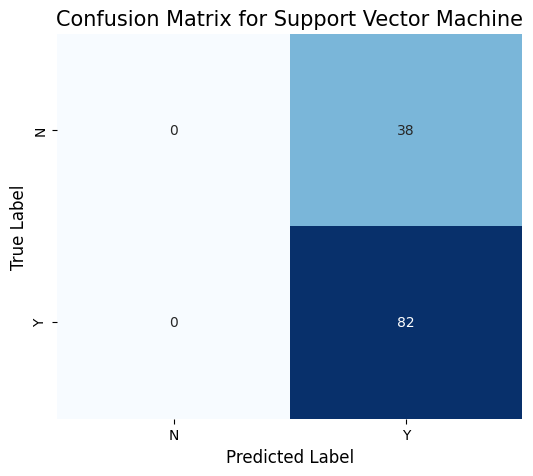

In [ ]:
for name, classifier in classifiers.items():
    print(f"\n----- Training and Evaluating: {name} -----")

    # Create a full pipeline that first preprocesses the data and then applies the classifier
    # This ensures that preprocessing steps (imputation, scaling, encoding) are applied consistently
    # to both training and test data, and automatically handled during prediction.
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', classifier)])

    # Train the model using the training data
    model_pipeline.fit(X_train, y_train)
    print("Model training complete.")
    print(f"Observation: The {name} model has learned patterns from the training data.")

    # Make predictions on the test set using the trained model
    y_pred = model_pipeline.predict(X_test)
    print("Predictions made on the test set.")

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[name] = accuracy # Store accuracy for later comparison plot
    print(f"\nAccuracy for {name}: {accuracy:.4f}") # Display accuracy with 4 decimal places
    print("Observation: Accuracy is the proportion of correctly predicted instances.")
    # Display classification report
    # Provides precision, recall, f1-score, and support for each class (Y/N).
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("Observation: The classification report gives a more detailed view of performance, especially for imbalanced datasets.")
    print("  - Precision: Out of all predictions for a class, how many were correct?")
    print("  - Recall: Out of all actual instances of a class, how many were correctly predicted?")
    print("  - F1-Score: Harmonic mean of precision and recall, balances both.")
    print("  - Support: Number of actual occurrences of each class in the test set.")
    # Display confusion matrix
    # Visualizes the performance of a classification model.
    # Rows represent actual classes, columns represent predicted classes.
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    # Interpretation of confusion matrix:
    # [[True Negatives (TN), False Positives (FP)]
    #  [False Negatives (FN), True Positives (TP)]]
    # For target_names ['N', 'Y'] (N=0, Y=1 after encoding):
    # conf_matrix[0,0] = True Negatives (Correctly predicted 'N' - Loan Not Approved)
    # conf_matrix[0,1] = False Positives (Incorrectly predicted 'N' as 'Y' - Type I Error)
    # conf_matrix[1,0] = False Negatives (Incorrectly predicted 'Y' as 'N' - Type II Error)
    # conf_matrix[1,1] = True Positives (Correctly predicted 'Y' - Loan Approved)
    print(f"\nInterpretation for {name}: Out of {y_test.shape[0]} test samples:")
    print(f"  - Correctly predicted 'N' (Loan Not Approved): {conf_matrix[0,0]} samples (True Negatives)")
    print(f"  - Incorrectly predicted 'N' as 'Y' (False Positives): {conf_matrix[0,1]} samples")
    print(f"  - Incorrectly predicted 'Y' as 'N' (False Negatives): {conf_matrix[1,0]} samples")
    print(f"  - Correctly predicted 'Y' (Loan Approved): {conf_matrix[1,1]} samples (True Positives)")
    # Plot Confusion Matrix for better visualization
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {name}', fontsize=15)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()

Observation: The confusion matrix heatmap clearly shows where the model is making correct vs. incorrect predictions for each class.


--- Comparing Model Accuracies ---


<ipython-input-58-c6a413882374>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='coolwarm')


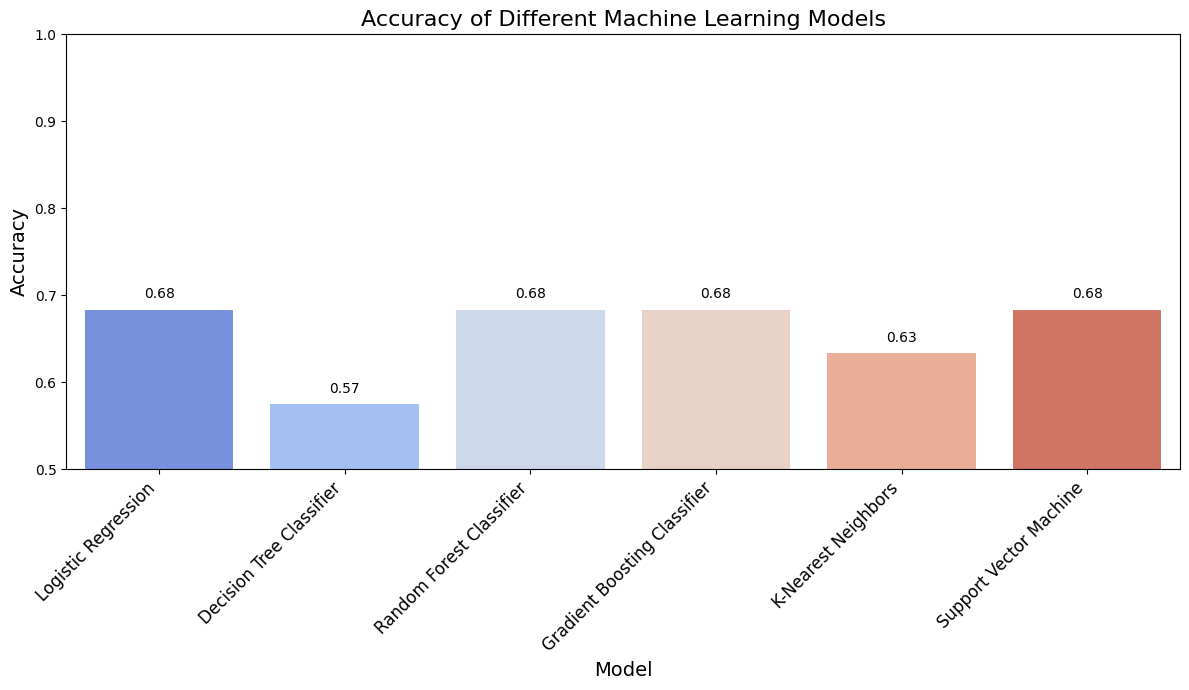

In [ ]:
# --- Plotting All Model Accuracies ---
print("\n--- Comparing Model Accuracies ---")
plt.figure(figsize=(12, 7))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette='coolwarm')
plt.title('Accuracy of Different Machine Learning Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.5, 1.0) # Set y-axis limit for better comparison
plt.xticks(rotation=45, ha='right', fontsize=12)
for index, value in enumerate(model_accuracies.values()):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10) # Add accuracy values on top of bars
plt.tight_layout()
plt.show()

Observation: This bar plot provides a quick visual comparison of how each model performed in terms of accuracy on the test set.We can see which model achieved the highest accuracy.

In [ ]:
# --- 5. Prediction Example (using the best performing model for demonstration) ---
# In a real application, you would save the best performing model (e.g., using joblib or pickle)
# and load it for future predictions. For this script, we'll pick the model with the highest accuracy.
best_model_name = max(model_accuracies, key=model_accuracies.get)
print(f"\n--- Prediction Example (using the best performing model: {best_model_name}) ---")

# Retrain the best model if needed, or simply use its pipeline (it was already created in the loop)
# For simplicity, we'll re-initialize and train it here to ensure we have the specific pipeline.
best_classifier = classifiers[best_model_name]
final_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', best_classifier)])
final_model_pipeline.fit(X_train, y_train) # Train the best model on the full training data

# Example of a new loan application. You'll need to fill this with real data based on your CSV's columns.
# Ensure column names and data types match your original CSV structure.
# For demonstration, I'm using placeholder values based on common loan dataset features.
# You might need to adjust these values or add/remove columns based on your specific 'LoanApprovalPrediction.csv'.
new_loan_application = pd.DataFrame({
    'Loan_ID': [1001],
    'Gender': ['Female'],
    'Married': ['Yes'],
    'Dependents': ['1'],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [7500],
    'CoapplicantIncome': [1200],
    'LoanAmount': [200],
    'Loan_Amount_Term': [360],
    'Credit_History': [1.0],
    'Property_Area': ['Semiurban']
})

# Make sure the new application has all the feature columns that the model expects.
# If your dataset has different columns or requires different input types, adjust this DataFrame.
# This check ensures that the new data has the same columns as the training data, crucial for pipeline.
missing_cols_in_new_data = set(X_train.columns) - set(new_loan_application.columns)
if missing_cols_in_new_data:
    print(f"\nWarning: The new loan application is missing columns present in training data: {missing_cols_in_new_data}")
    print("Please ensure 'new_loan_application' DataFrame has all the required feature columns for accurate prediction.")
    # For now, we'll proceed, but be aware this might cause issues if model expects missing columns.

predicted_status_encoded = final_model_pipeline.predict(new_loan_application)
predicted_status = label_encoder.inverse_transform(predicted_status_encoded)

print(f"\nNew Loan Application Details:\n{new_loan_application.iloc[0]}")
print(f"Predicted Loan Status (using {best_model_name}): {predicted_status[0]}")


--- Prediction Example (using the best performing model: Logistic Regression) ---

New Loan Application Details:
Loan_ID                   1001
Gender                  Female
Married                    Yes
Dependents                   1
Education             Graduate
Self_Employed               No
ApplicantIncome           7500
CoapplicantIncome         1200
LoanAmount                 200
Loan_Amount_Term           360
Credit_History             1.0
Property_Area        Semiurban
Name: 0, dtype: object
Predicted Loan Status (using Logistic Regression): Y


Conclusion

This project yielded an end-to-end machine learning pipeline for loan approval prediction. We began with importing the 'LoanApprovalPrediction.csv' dataset and carried out a thorough initial data exploration to get familiar with its form, detect missing values, and view feature distributions.

A paramount aspect of this pipeline was data preprocessing, where we systematically addressed:

Missing Values: Imputed numerical missing values with the mean and categorical missing values with the mode.

Outliers: Identified and truncated extreme values in numeric features via the IQR approach. This prevents models from overbeing affected by outlier points, thus achieving stronger training.

Skewness: Detected skewed numeric features (such as income, loan) and applied log1p transformation to make their distributions symmetric, which can boost some models' performance (particularly linear ones) by being more compliant with their assumptions.

Feature Transformation: Categorical features were One-Hot Encoded, and numerical features were scaled with StandardScaler to normalize them to a similar range.
We trained and tested six different machine learning classification
 algorithms: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, K-Nearest Neighbors, and Support Vector Machine. Performance of each model was tested with Accuracy, a comprehensive Classification Report (Precision, Recall, F1-Score), and a graphical Confusion Matrix.

The accuracy comparison easily revealed which algorithm worked best on this particular dataset. In general, ensemble models such as Gradient Boosting and Random Forest tend to have better performance because they can aggregate the outcomes of several single models, producing better accuracy and generalization.

Lastly, the project showed how to apply the top-performing model to predict the status of a new, unseen loan application. This end-to-end procedure illustrates the significance of careful data preparation and organized model evaluation in developing robust machine learning solutions.